### Module importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical # Convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator # data를 label과 함께 model로 쉽게 import 하기 위해 사용, 저장된 데이터에 영향을 주지 않고 모델에 전달하는 동안 데이터를 변경

import os
import warnings
warnings.filterwarnings('ignore')

C:\Users\dhsmf\AppData\Local\Temp\ipykernel_3468\1402021043.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Loading and preprocessing

### Data Loading

In [2]:
# Path & Data File
input_path = '../input/'
output_path = '../output/'
train_data = 'train.csv'
test_data = 'test.csv'

In [3]:
# Data loading
train = pd.read_csv(input_path + train_data)
test = pd.read_csv(input_path + test_data)

In [4]:
# Define Data Preprocessing Function
def preprocessing(train):
    # Split Label from raw train data
    Y_train = train['label']
    X_train = train.drop(labels=['label'], axis=1)

    # Normalize the data
    X_train = X_train / 255.0 # pixel값의 범위가 0~255이므로 정규화를 위해 255.0로 나눔

    # Reshape
    X_train = X_train.values.reshape(-1,28,28,1) # 흑백 이미지이므로 4번째 인자의 수치를 '1'; 유색일 경우, '3'

    # Label Encoding
    Y_train = to_categorical(Y_train, num_classes=10) # As the number 0 to 9, num_classes=10

    # Train, Test split to 9:1
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
    
    return X_train, X_val, Y_train, Y_val

In [5]:
# Parameters Setting
NUM_EPOCHS = 10
BATCH_SIZE = 250
VALID_SPLIT = 0.1

In [6]:
# Data Setting
X_train, X_val, Y_train, Y_val = preprocessing(train)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

class CustomCNNModel(tf.keras.Model):
    def __init__(self):
        super(CustomCNNModel, self).__init__()

        # Convolutional Layer 1
        self.conv1 = layers.Conv2D(filters=8, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1))
        self.pool1 = layers.MaxPool2D(pool_size=(2, 2))
        self.dropout1 = layers.Dropout(0.25)

        # Convolutional Layer 2
        self.conv2 = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='Same', activation='relu')
        self.pool2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))
        self.dropout2 = layers.Dropout(0.25)

        # Fully-connected Layers
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(256, activation='relu')
        self.dropout3 = layers.Dropout(0.5)
        self.fc2 = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout3(x)
        x = self.fc2(x)

        return x

In [10]:
# 모델 인스턴스 생성
custom_model = CustomCNNModel()

In [11]:
# 모델 컴파일 (원하는 optimizer, loss, metrics 등을 추가하세요)
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 모델 구조 출력
print(custom_model.summary())

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Data augmentation
# How to use this?

In [14]:
# Fit the model
history = custom_model.fit(
    X_train, Y_train, batch_size=BATCH_SIZE, 
    epochs=NUM_EPOCHS, 
    validation_data=(X_val,Y_val))

Epoch 1/10


152/152 [==============================] - 12s 43ms/step - loss: 0.7149 - accuracy: 0.7711 - val_loss: 0.2073 - val_accuracy: 0.9398
Epoch 2/10
152/152 [==============================] - 6s 37ms/step - loss: 0.2573 - accuracy: 0.9199 - val_loss: 0.1196 - val_accuracy: 0.9636
Epoch 3/10
152/152 [==============================] - 6s 38ms/step - loss: 0.1855 - accuracy: 0.9434 - val_loss: 0.0908 - val_accuracy: 0.9712
Epoch 4/10
152/152 [==============================] - 6s 37ms/step - loss: 0.1462 - accuracy: 0.9535 - val_loss: 0.0731 - val_accuracy: 0.9760
Epoch 5/10
152/152 [==============================] - 6s 38ms/step - loss: 0.1307 - accuracy: 0.9586 - val_loss: 0.0627 - val_accuracy: 0.9814
Epoch 6/10
152/152 [==============================] - 6s 38ms/step - loss: 0.1184 - accuracy: 0.9627 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 7/10
152/152 [==============================] - 6s 37ms/step - loss: 0.1055 - accuracy: 0.9666 - val_loss: 0.0523 - val_accuracy: 0.9

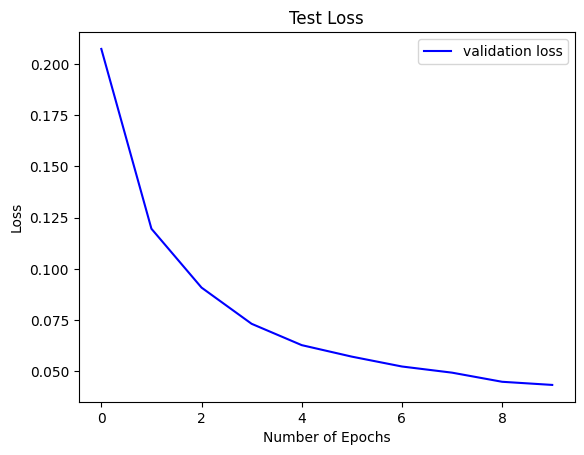

In [15]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 4ms/step


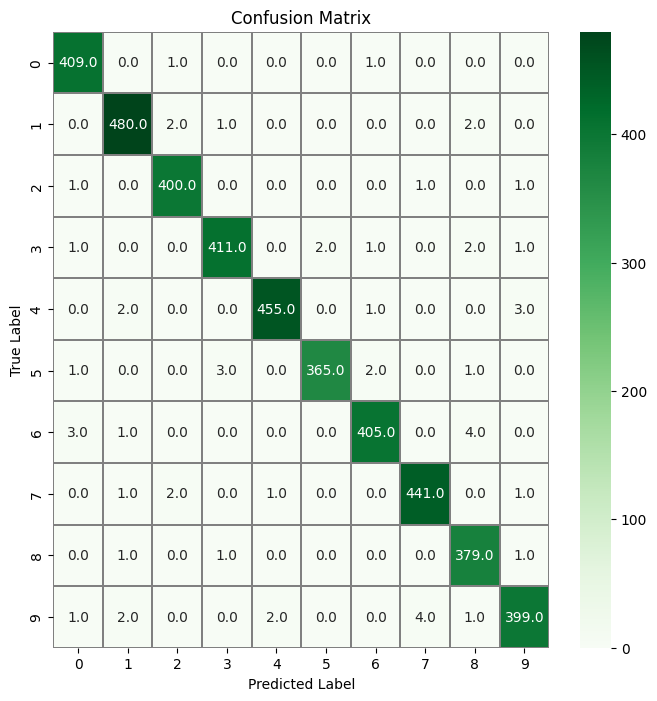

In [16]:
# confusion matrix
# Predict the values from the validation dataset
Y_pred = custom_model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()